# **Import The Libraries and Packages**

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip3 install snscrape
!pip install guess-language
!pip install guess_language-spirit

# **Extract and Analyze the Data**

In [ ]:
querySearch = input("Enter the query: ")
since = input("Enter the start date: ")
until = input("Enter the end date: ")

Enter the query: IPL
Enter the start date: 2021-01-01
Enter the end date: 2021-05-05


In [ ]:
import snscrape.modules.twitter as sntwitter

# Creating list to append tweet data to
t_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{querySearch} since:{since} until:{until}').get_items()):
    if i>500:
        break
    t_list.append([tweet.content])
  
text = t_list


**Create a DataFrame with a column called Tweets that’ll contain the posts about a certain query, and then show the first five rows**

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame(t_list, columns=['Text'])
# Show the first 5 rows of data
df.head()

,Text
0,IPL 2021: BCCI mull moving all remaining match...
1,@TheSouthMovies1 Bhai ab to mersal movie hindi...
2,"With the IPL/India travel ban, the Australian ..."
3,@zeshanalie @Irumf Tumhare ammi abu ka nahi ka...
4,@pranayvancha Thank you Pranaybaba.... IPL sus...


**The data is a little dirty because it contains the @ symbol, hyperlinks, RTs, and may contain hash tags, so I’ll clean it up by creating a function to remove these symbols from the tweets. Then, apply that function to the tweets and show the results**

In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
 text = regrex_pattern.sub(r'',text)
 
 return text

# Clean the tweets
df['Text'] = df['Text'].apply(cleanTxt)

# Show the cleaned tweets
df

,Text
0,IPL 2021: BCCI mull moving all remaining match...
1,1 Bhai ab to mersal movie hindi me aayegi qnki...
2,"With the IPL/India travel ban, the Australian ..."
3,Tumhare ammi abu ka nahi kah sakta par mere ...
4,Thank you Pranaybaba.... IPL suspended after ...
...,...
496,IPL Fantasy 2021: Best Fantasy XI for Match 31...
497,IPL suspension nuomi no point in life anymore 🥲
498,Around the day the IPL started India’s Covid ...
499,Prediction IPL Ipl2021 COVIDEmergencyIndia COV...


**We need to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, We have to create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).
Next, store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.**

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Text,Subjectivity,Polarity
0,IPL 2021: BCCI mull moving all remaining match...,0.000000,0.000000
1,1 Bhai ab to mersal movie hindi me aayegi qnki...,0.000000,0.000000
2,"With the IPL/India travel ban, the Australian ...",0.188889,-0.055556
3,Tumhare ammi abu ka nahi kah sakta par mere ...,0.500000,-0.500000
4,Thank you Pranaybaba.... IPL suspended after ...,0.000000,0.000000
...,...,...,...
496,IPL Fantasy 2021: Best Fantasy XI for Match 31...,0.300000,1.000000
497,IPL suspension nuomi no point in life anymore 🥲,0.000000,0.000000
498,Around the day the IPL started India’s Covid ...,1.000000,0.000000
499,Prediction IPL Ipl2021 COVIDEmergencyIndia COV...,0.000000,0.000000


**Visualizing all the words in the data using the word-cloud plot to see how well the sentiments are distributed**

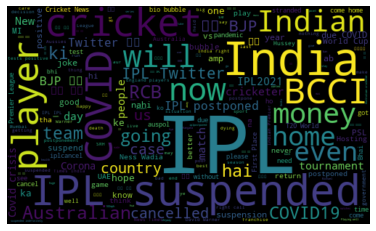

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
 
 
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Create a function to compute the negative (-1), neutral (0), and positive (+1) analysis, and add the information to a new column called Analysis. Then, show the results.**

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Text,Subjectivity,Polarity,Analysis
0,IPL 2021: BCCI mull moving all remaining match...,0.000000,0.000000,Neutral
1,1 Bhai ab to mersal movie hindi me aayegi qnki...,0.000000,0.000000,Neutral
2,"With the IPL/India travel ban, the Australian ...",0.188889,-0.055556,Negative
3,Tumhare ammi abu ka nahi kah sakta par mere ...,0.500000,-0.500000,Negative
4,Thank you Pranaybaba.... IPL suspended after ...,0.000000,0.000000,Neutral
...,...,...,...,...
496,IPL Fantasy 2021: Best Fantasy XI for Match 31...,0.300000,1.000000,Positive
497,IPL suspension nuomi no point in life anymore 🥲,0.000000,0.000000,Neutral
498,Around the day the IPL started India’s Covid ...,1.000000,0.000000,Neutral
499,Prediction IPL Ipl2021 COVIDEmergencyIndia COV...,0.000000,0.000000,Neutral


**Print the positive tweets in ascending order. The most positive tweet is the #1 tweet**

In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Text'][i])
    print()
    j= j+1

Printing positive tweets:

1)  I did it when the Epilady first came out, and YEOUCH!!! That said, after only a few uses, there were spots on the shins that were never more than sparse hair after and I have a modern one that is initially noticeable, but between it and IPL, some progress.

2) New post (England players begin to head home after IPL suspended) published on  - 

3) Australian Legend Michael Hussey tested 
positive in India during IPL 2021 :

If anything happens to him , who will be
responsible?

~Indian Government ?
~BCCI ?
~He Himself ?
~Cricket Australia ?

Anyways get well soon legend ❤️ 

4) Bio Secure Bubble in PSL &amp; IPL 
PSL2021 IPL2021 BCCI PCB cricket 

5)  Was it ever meant to be a joke? No, not now, never before. I was in favour of IPL without stadium audience because it brings happiness and cheer to us indians which we really need nowdays. But the security bubble failed, so IPL must be stopped.

6) 100mph IPL Cancelled. Alhamdulillah it's good news. Hope now T

**Print the negative tweets in descending order. The most negative tweet is the #1 tweet.**

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Text'][i])
    print()
    j=j+1

Printing negative tweets:

1) With the IPL/India travel ban, the Australian public showing its typical compassion for the athletes that entertain us...ie, your job is risky, don’t make me think about it.

2)   Tumhare ammi abu ka nahi kah sakta par mere Ammi aur Abba dono Pakistan born hain, and what does IPL has to do with anything ? waise bhi mai cricket nahi dekhta , aur jo banda Ramzan mai kisi ki maut ki dua manaye vo ekdum ghatiya tareen insaan hai, Allah hidayat de tum jaiso ko

3) BCCI set to incur losses of over Rs 2000 crore due to COVID-forced IPL postponement | Cricket News – Times of India 

4)  It's very bad decision but what to do as covid affect cricke

5) Cancel Cricket for Men!! 
Give the Game to the Girls! 
4 arrested over kidnapping of Stuart MacGill? 
Cricket's Hussey 'positive for COVID' as IPL cancelled? 
Deputy PM: 
India ban sends messages from Dopes in Australia's Political Scene?  

6) IPL suspended due to Covid-19, foreign players fret over return 

7) 100mp

**Plot the polarity and subjectivity as a scatter plot. It looks like the majority of the tweets are positive, as many of the points are on the right side of the polarity at value 0.00.**

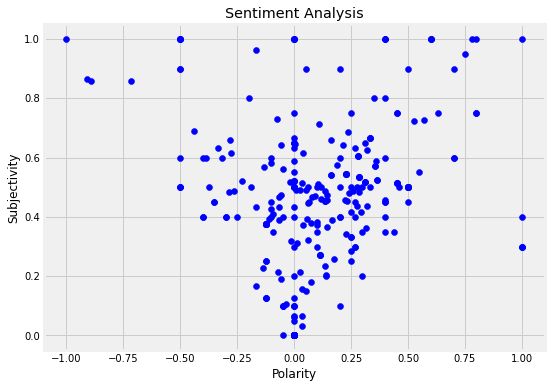

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

**Print the percentage of positive tweets. About 81/100 of the tweets are considered positive tweets**

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Text']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

33.1

**Print the percentage of negative tweets. About 9/100 tweets are considered negative tweets**

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Text']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

16.0

**Show the value counts. Now we can see 81 tweets are positive, 10 are neutral, and 9 are negative**

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     255
Positive    166
Negative     80
Name: Analysis, dtype: int64

**Visually show the value counts**

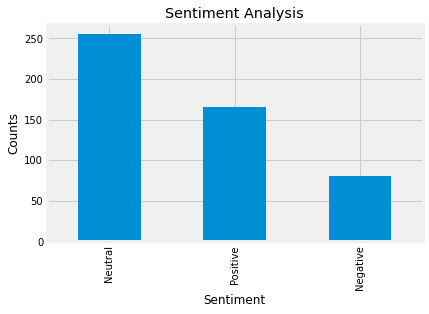

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()